In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas

from data_loader import data_label_split
from data_loader import generate_data_set
from data_loader import dmso_taxol_ProfileBag

from exp import mini_noise_signal_cv
from exp import z_score
from exp import train

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import torch.utils.data as D

In [8]:
[pool.apply_async(z_score, args=(i, cv, data, model,'DMSO',"taxol",verbose)) for i in range(5,96,5)]

1

Load data

In [2]:
drop_NA_data=pd.read_csv("moa_data_drop_NA.csv", index_col=0)

In [3]:
mini_data = pd.read_csv("mini_moa_data_drop_NA.csv", index_col = 0)

# Full features
## Logistic Regression

In [5]:
lgr = LogisticRegression(max_iter = 10000, solver = "saga", n_jobs = -1)
# train(10000, drop_NA_data, lgr, 0)

In [4]:
# single feature
sf_drop_NA_data = mini_data[["compound", "concentration",
                                "moa", "row ID", "Iteration (#2)", "COND",
                               "AreaShape_Area_Nuclei"]]
lgr = LogisticRegression(max_iter = 10000, solver = "saga", n_jobs = -1)
# train(10000, sf_drop_NA_data, lgr, 0)

In [ ]:
# cost one hour to train with datasize 500

result1 = mini_noise_signal_cv(500, mini_data, "taxol", "DMSO", lgr, 10, 0)

 95%|█████████▍| 18/19 [52:49<03:13, 193.63s/it] 

In [7]:
(mean_mean_accuracy, std_mean_accuracy, 
 mean_pred_score_control, std_pred_score_control,
 mean_pred_score_treatment, std_pred_score_treatment) = result1

In [115]:
mean_z_score_control = np.array(mean_pred_score_control)
std_z_score_control = np.array(std_pred_score_control)
mean_z_score_treatment = np.array(mean_pred_score_treatment)
std_z_score_treatment = np.array(std_pred_score_treatment)

Text(0.5, 1.0, 'DMSO prediction score with change of %taxol')

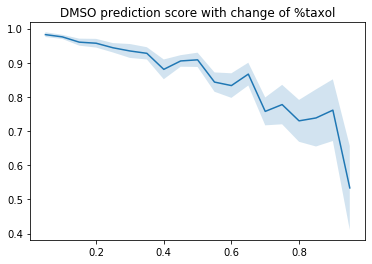

In [113]:
plt.plot([i/100 for i in range(5,96,5)], mean_z_score_control, '-')
plt.fill_between([i/100 for i in range(5,96,5)], 
                 (mean_z_score_control)-std_z_score_control, mean_z_score_control+std_z_score_control, alpha=0.2)
plt.title("DMSO prediction score with change of %taxol")

Text(0.5, 1.0, 'taxol prediction score v.s. change of %taxol\n minibatch with size 500, Logistic Regression')

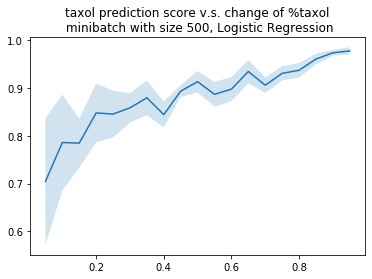

In [121]:
plt.plot([i/100 for i in range(5,96,5)], mean_z_score_treatment, '-')
plt.fill_between([i/100 for i in range(5,96,5)], 
                 (mean_z_score_treatment)-std_z_score_treatment, mean_z_score_treatment + std_z_score_treatment, alpha=0.2)
plt.title("taxol prediction score v.s. change of %taxol\n minibatch with size 500, Logistic Regression")


## RF

In [6]:
RF_model =  RandomForestClassifier(min_samples_split=50, random_state=0)

In [ ]:
result1 = mini_noise_signal_cv(10000, drop_NA_data, "taxol", "DMSO", RF_model, 10, 0)

 11%|█         | 2/19 [08:09<1:09:19, 244.67s/it]

In [ ]:
print("data loaded")
train(10000, drop_NA_data, RF_model, 0)

  0%|          | 0/19 [00:00<?, ?it/s]

data loaded


 37%|███▋      | 7/19 [28:02<47:56, 239.70s/it]  

In [5]:
result = mini_noise_signal_cv(500, mini_data, "taxol", "DMSO", RF_model, 10, 0) 

100%|██████████| 19/19 [01:51<00:00,  5.88s/it]


In [6]:
(mean_mean_accuracy1, std_mean_accuracy1, 
 mean_pred_score_control1, std_pred_score_control1,
 mean_pred_score_treatment1, std_pred_score_treatment1) = result

In [7]:
mean_z_score_control1 = np.array(mean_pred_score_control1)
std_z_score_control1 = np.array(std_pred_score_control1)
mean_z_score_treatment1 = np.array(mean_pred_score_treatment1)
std_z_score_treatment1 = np.array(std_pred_score_treatment1)

Text(0.5, 1.0, 'DMSO prediction score with change of %taxol')

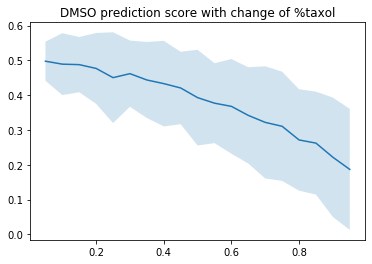

In [8]:
plt.plot([i/100 for i in range(5,96,5)], mean_z_score_control1, '-')
plt.fill_between([i/100 for i in range(5,96,5)], 
                 (mean_z_score_control1)-std_z_score_control1, mean_z_score_control1+std_z_score_control1, alpha=0.2)
plt.title("DMSO prediction score with change of %taxol")

Text(0.5, 1.0, 'taxol prediction score v.s. change of %taxol\n minibatch with size 500, Logistic Regression')

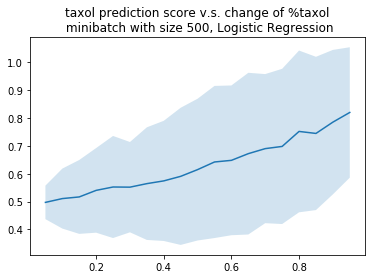

In [9]:
plt.plot([i/100 for i in range(5,96,5)], mean_z_score_treatment1, '-')
plt.fill_between([i/100 for i in range(5,96,5)], 
                 (mean_z_score_treatment1)-std_z_score_treatment1, mean_z_score_treatment1 + std_z_score_treatment1, alpha=0.2)
plt.title("taxol prediction score v.s. change of %taxol\n minibatch with size 500, Logistic Regression")



# Single features
## Logistic Regression

# Old

In [87]:
def mini_noise_signal(size, data, treatment, control, model):
    p_acc=[]
    n_acc=[]
    for i in range(5,96,5):
        mini_batch = generate_data_set(size, i/100, data, "taxol", "DMSO")
        X, y = data_label_split(mini_batch)
        y=y['compound']
        model.fit(X, y)
        y_pred = model.predict(X)
        cm = confusion_matrix(y,y_pred)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        n_acc.append(cm.diagonal()[0])
        p_acc.append(cm.diagonal()[1])
    return p_acc, n_acc

In [88]:
clf = RandomForestClassifier(min_samples_split=50, random_state=0)

In [89]:
p_, n_ = mini_noise_signal(1000, drop_NA_data, "taxol", "DMSO", clf)

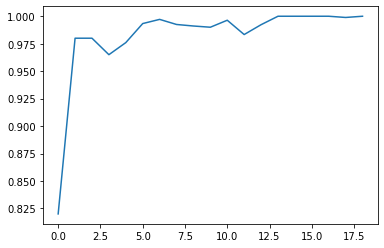

In [93]:
plt.plot(n_)

In [74]:
p_acc=[]
n_acc=[]
for i in range(5,96,5):
    mini_batch = generate_data_set(1000, i/100, drop_NA_data, "taxol", "DMSO")
    X, y = data_label_split(mini_batch)
    y=y['compound']
    
    clf = LogisticRegression(max_iter = 10000, solver = "saga")
    clf.fit(X, y)
    y_pred = clf.predict(X)
    cm = confusion_matrix(y,y_pred )
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    n_acc.append(cm.diagonal()[0])
    p_acc.append(cm.diagonal()[1])

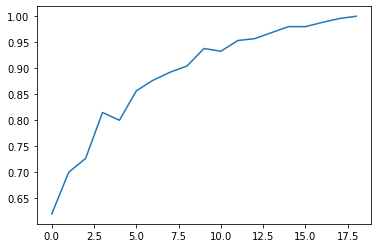

In [78]:
plt.plot(n_acc)

In [63]:

mini_batch = generate_data_set(100, 0.5, drop_NA_data, "taxol", "DMSO")
X, y = data_label_split(mini_batch)
lb = LabelEncoder()
# y = lb.fit_transform(y['compound'])
y=y['compound']

In [64]:
clf = LogisticRegression(max_iter = 10000, solver = "saga")
clf.fit(X, y)
y_pred = clf.predict(X)

In [65]:
cm = confusion_matrix(y,y_pred )

In [66]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

In [73]:
cm.diagonal()[0]

0.88

In [68]:
confusion_matrix(y,y_pred )

array([[44,  6],
       [ 2, 48]])

Text(0.5, 0, 'percent of taxol')

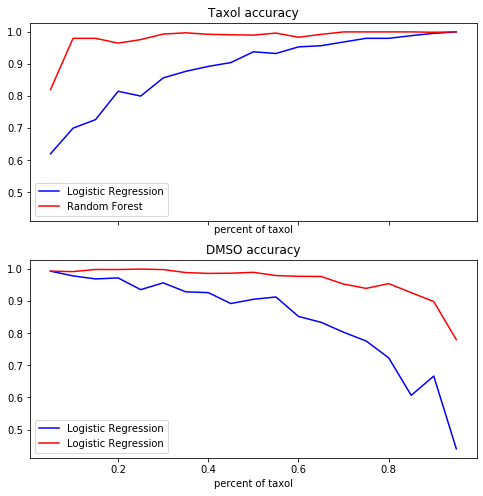

In [112]:
fig, ax = plt.subplots(2, sharex=True, sharey=True,figsize=(8, 8))
l1 = ax[0].plot([i/100 for i in range(5,96,5)], n_acc, color = 'b', label = "Logistic Regression")
l2 = ax[0].plot([i/100 for i in range(5,96,5)], n_, color = 'r', label = "Random Forest")
ax[0].legend()
ax[0].title.set_text("Taxol accuracy")
ax[0].set_xlabel('percent of taxol')
l3 = ax[1].plot([i/100 for i in range(5,96,5)], p_acc, color = 'b',label = "Logistic Regression")
l4 = ax[1].plot([i/100 for i in range(5,96,5)], p_, color = 'r',label = "Logistic Regression")
ax[1].legend()
ax[1].title.set_text("DMSO accuracy")
ax[1].set_xlabel('percent of taxol')